In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import math
import pandas as series
import numpy as np
import requests
import time
import geopandas as gpd
import json
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import display_html
from matplotlib import pyplot
import geopandas as gpd
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
input_data_path = "DataSource/Covid_data1/worldometer_coronavirus_daily_data.csv"

# Output File (CSV)
output_data_file = "output_data/cities_covid.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Read through the raw data 
covid_metadata_df = pd.read_csv(input_data_path)
covid_metadata_df.head()
covid_metadata_df.tail()


,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
145216,2021-11-28,Zimbabwe,133991.0,40.0,631.0,4705.0,0.0
145217,2021-11-29,Zimbabwe,134226.0,235.0,817.0,4706.0,1.0
145218,2021-11-30,Zimbabwe,134625.0,399.0,1171.0,4707.0,1.0
145219,2021-12-01,Zimbabwe,135337.0,712.0,1846.0,4707.0,0.0
145220,2021-12-02,Zimbabwe,136379.0,1042.0,2843.0,4707.0,0.0


AttributeError: 'Series' object has no attribute 'target'

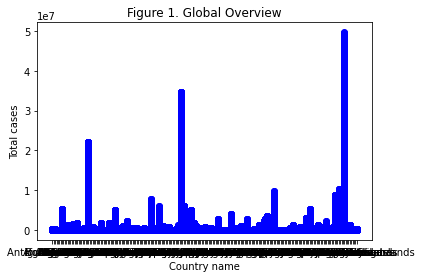

In [13]:
covid_metadata_df.describe()

x = covid_metadata_df['country']
y = covid_metadata_df['cumulative_total_cases']
plt.title('Figure 1. Global Overview')
plt.xlabel('Country name')
plt.ylabel('Total cases')

plt.plot(x, y,'o',color='blue')
plt.savefig("Images/Figure 1. Global Overview.png")



iris = covid_metadata_df['cumulative_total_cases']
features = covid_metadata_df['cumulative_total_deaths']
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])


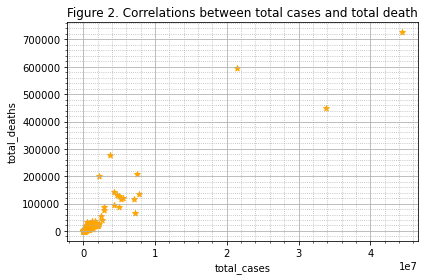

In [29]:
# Generate a geographic distribution maps
covid_metadata_cumulative_df=covid_metadata_df.sort_values('date').groupby('country').tail(1)
covid_metadata_cumulative_df

country= covid_metadata_cumulative_df1['country']
covid_metadata_cumulative_country = covid_metadata_cumulative_df1['country'].replace(['USA'],'United States of America')

covid_cumulative_1 = covid_metadata_cumulative_df1['cumulative_total_cases']
covid_cumulative_2 = covid_metadata_cumulative_df1['cumulative_total_deaths']

summary_covid_df = pd.DataFrame({"Country": country, "total_cases": covid_cumulative_1,"total_deaths": covid_cumulative_2})
summary_covid_df

summary_covid_df.to_csv("summary_covid_df.csv", index=False, header=True)
summary_covid_df.head()

x_values_1 = covid_metadata_cumulative_df["cumulative_total_cases"]
y_values_1 = covid_metadata_cumulative_df["cumulative_total_deaths"]

plt.scatter(x_values_1,y_values_1,marker = "*", color="orange")
plt.title('Figure 2. Correlations between total cases and total death')
plt.xlabel('total_cases')
plt.ylabel('total_deaths')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/Correlations_1.png")
plt.show()


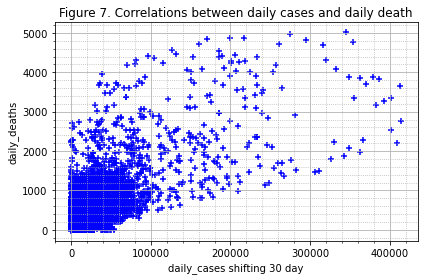

In [12]:
x_values_2 = covid_metadata_df["daily_new_cases"].shift(30) 
y_values_2 = covid_metadata_df["daily_new_deaths"]

plt.scatter(x_values_2,y_values_2,marker = "+", color="blue")
plt.title('Figure 7. Correlations between daily cases and daily death')
plt.xlabel('daily_cases shifting 30 day')
plt.ylabel('daily_deaths')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/Correlations_day30.png")
plt.show()




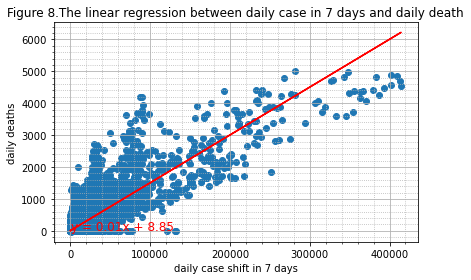

0.7311438878559272

In [13]:
# Clean the data 
covid_metadata_df["daily_new_cases"] = covid_metadata_df["daily_new_cases"].fillna(0)
covid_metadata_df["daily_new_deaths"] = covid_metadata_df["daily_new_deaths"].fillna(0)
covid_metadata_df

# Linear Regression 1
x_values_2 = covid_metadata_df["daily_new_cases"].shift(7) 
y_values_2 = covid_metadata_df["daily_new_deaths"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_2[7:], y_values_2[7:])
regress_values = x_values_2[7:] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values_2[7:], y_values_2[7:])


plt.scatter(x_values_2[7:],y_values_2[7:])
plt.title('Figure 8.The linear regression between daily case in 7 days and daily death')
plt.plot(x_values_2[7:],regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('daily case shift in 7 days')
plt.ylabel('daily deaths')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/Regression1.png")
plt.show()

rvalue**2

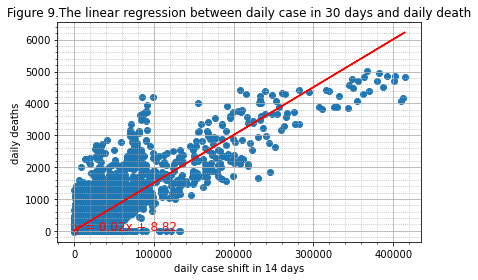

0.7329235384482434

In [64]:
# Linear Regression 2
x_values_3 = covid_metadata_df["daily_new_cases"].shift(14) 
y_values_3 = covid_metadata_df["daily_new_deaths"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_3[14:], y_values_3[14:])
regress_values = x_values_3[14:] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values_3[14:], y_values_3[14:])

plt.scatter(x_values_3[14:],y_values_3[14:])
plt.title('Figure 9.The linear regression between daily case in 30 days and daily death')
plt.plot(x_values_3[14:],regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('daily case shift in 14 days')
plt.ylabel('daily deaths')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/Regression2.png")
plt.show()

rvalue**2





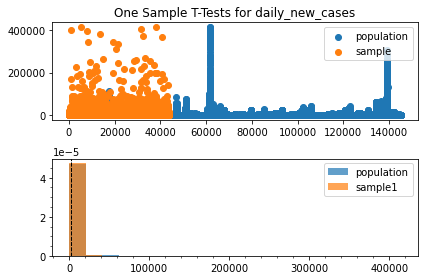

Ttest_1sampResult(statistic=-1.1622822511773028, pvalue=0.24512720082546963)

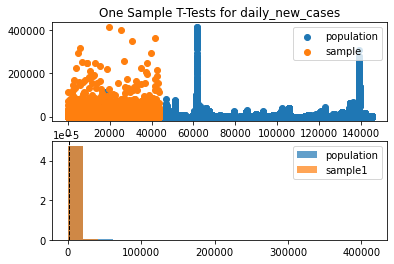

In [14]:
# Statistic test 
import scipy.stats as stats
import warnings
import random
from matplotlib import pyplot as plt
import numpy as np

warnings.filterwarnings('ignore')

# Statistic test of population 
# Regression analysis 1 test 1

def gendata():
    population = x_values_2.fillna(0)
    # sample = x_values_2[7:]
    sample1 = x_values_2.fillna(0).sample(frac=0.3,replace=True)
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.title('One Sample T-Tests for daily_new_cases')
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample1)), sample1, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample1, 20, density=True, alpha=0.7, label="sample1")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample1

    
population, sample1 = gendata()
stats.ttest_1samp(sample1, population.mean())
plt.minorticks_on()
plt.tight_layout()
plt.show()
population, sample1 = gendata()
plt.savefig("Images/T_test1.png")
stats.ttest_1samp(sample1, population.mean())


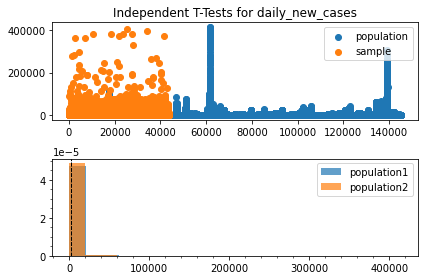

Ttest_indResult(statistic=-0.18646401257838502, pvalue=0.8520814423072699)

<Figure size 432x288 with 0 Axes>

In [15]:
# Regression analysis  test 2

def gendata():
    population1 = x_values_2.fillna(0)
    # sample = x_values_2[7:]
    population2 = x_values_2.fillna(0).sample(frac=0.3,replace=True)
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.title('Independent T-Tests for daily_new_cases')
    plt.scatter(range(len(population1)), population1, label="population")
    plt.scatter(range(len(population2)), population2, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 20, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 20, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2



population1, population2 = gendata()
plt.minorticks_on()
plt.tight_layout()
plt.show()

plt.savefig("Images/T_test2.png")
stats.ttest_ind(population1, population2, equal_var=False)



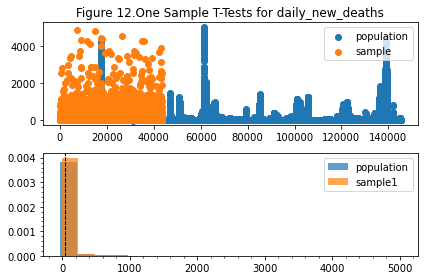

Ttest_1sampResult(statistic=-2.1883854792261817, pvalue=0.028646826340076138)

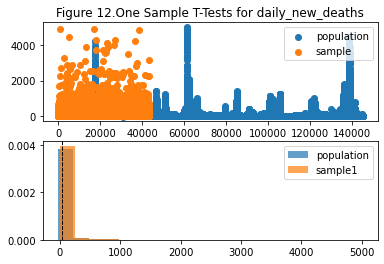

In [68]:
# Regression analysis test 3
def gendata():
    population = y_values_2.fillna(0)
    # sample = x_values_2[7:]
    sample1 = y_values_2.fillna(0).sample(frac=0.3,replace=True)
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.title('Figure 12.One Sample T-Tests for daily_new_deaths')
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample1)), sample1, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample1, 20, density=True, alpha=0.7, label="sample1")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample1

    
population, sample1 = gendata()
stats.ttest_1samp(sample1, population.mean())
plt.minorticks_on()
plt.tight_layout()
plt.show()
population, sample1 = gendata()
plt.savefig("Images/T_test3.png")
stats.ttest_1samp(sample1, population.mean())


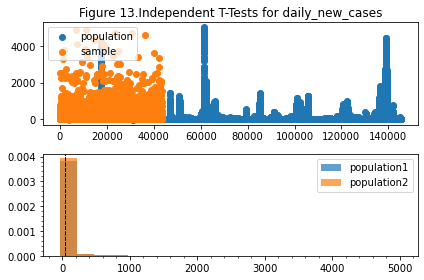

Ttest_indResult(statistic=0.11852711990765487, pvalue=0.9056503357153465)

<Figure size 432x288 with 0 Axes>

In [16]:
# Regression analysis test 4

def gendata():
    population1 = y_values_2.fillna(0)
    # sample = x_values_2[7:]
    population2 = y_values_2.fillna(0).sample(frac=0.3,replace=True)
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.title('Figure 13.Independent T-Tests for daily_new_cases')
    plt.scatter(range(len(population1)), population1, label="population")
    plt.scatter(range(len(population2)), population2, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 20, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 20, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

stats.ttest_ind(population1, population2, equal_var=False)

population1, population2 = gendata()
plt.minorticks_on()
plt.tight_layout()
plt.show()

plt.savefig("Images/T_test4.png")
stats.ttest_ind(population1, population2, equal_var=False)

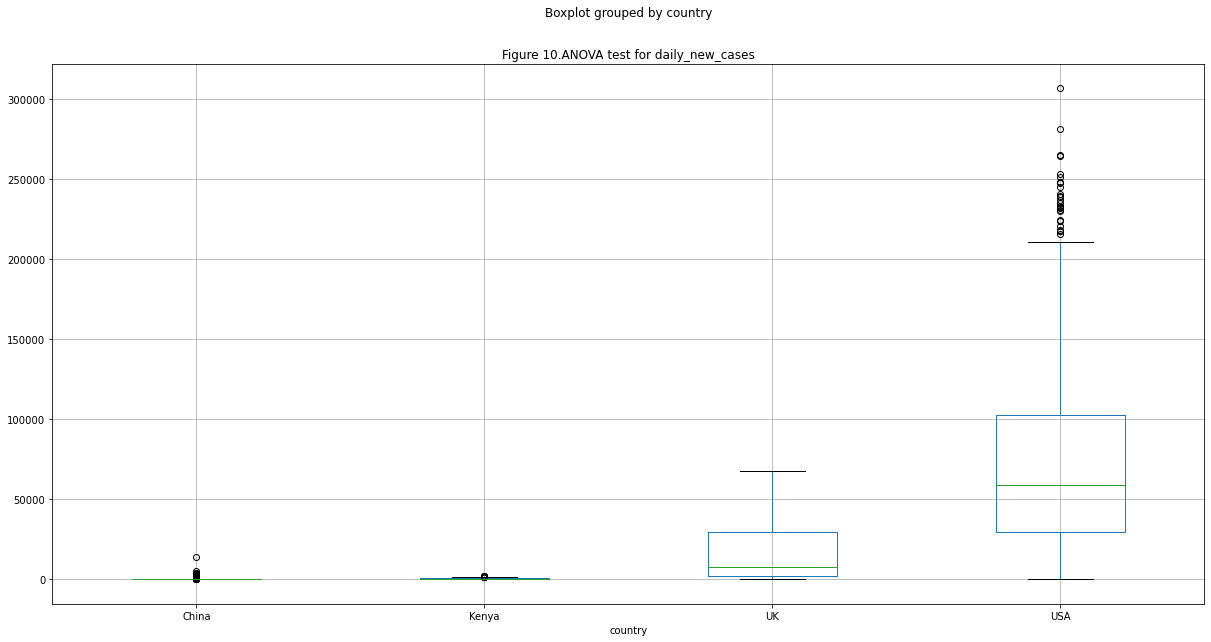

In [17]:
# ANOVA test 1
population1 = covid_metadata_df[covid_metadata_df["country"] == 'USA'].fillna(0)
population2 = covid_metadata_df[covid_metadata_df["country"] == 'China'].fillna(0) 
population3 = covid_metadata_df[covid_metadata_df["country"] == 'UK'].fillna(0)
population4 = covid_metadata_df[covid_metadata_df["country"] == 'Kenya'].fillna(0) 
df= population1.append(population2)
df= df.append(population3)
df= df.append(population4)
df.boxplot("daily_new_cases", by="country", figsize=(20, 10))

# Extract individual groups
group1 = df[df["country"] == "USA"]["daily_new_cases"]
group2 = df[df["country"] == "China"]["daily_new_cases"]
group3 = df[df["country"] == "UK"]["daily_new_cases"]
group4 = df[df["country"] == "Kenya"]["daily_new_cases"]

# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4)
plt.title('Figure 10.ANOVA test for daily_new_cases')
plt.savefig("Images/ANOVA1.png")

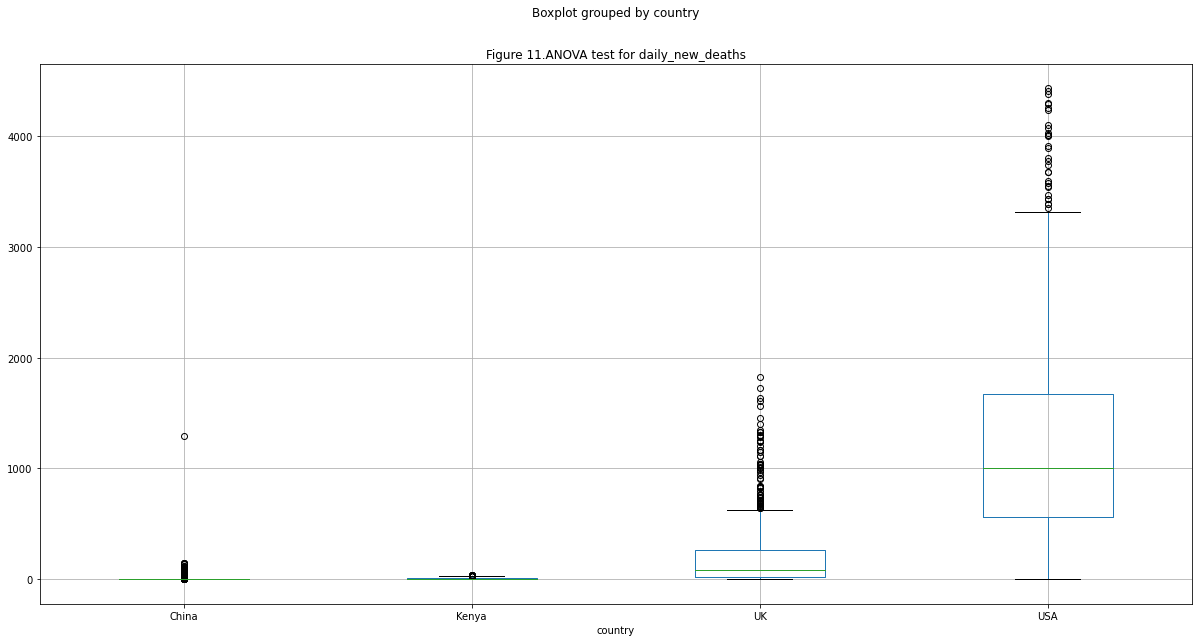

In [71]:
# ANOVA test 2
population1 = covid_metadata_df[covid_metadata_df["country"] == 'USA'].fillna(0)
population2 = covid_metadata_df[covid_metadata_df["country"] == 'China'].fillna(0) 
population3 = covid_metadata_df[covid_metadata_df["country"] == 'UK'].fillna(0)
population4 = covid_metadata_df[covid_metadata_df["country"] == 'Kenya'].fillna(0) 
df= population1.append(population2)
df= df.append(population3)
df= df.append(population4)
df.boxplot("daily_new_deaths", by="country", figsize=(20, 10))

# Extract individual groups
group1 = df[df["country"] == "USA"]["daily_new_deaths"]
group2 = df[df["country"] == "China"]["daily_new_deaths"]
group3 = df[df["country"] == "UK"]["daily_new_deaths"]
group4 = df[df["country"] == "Kenya"]["daily_new_deaths"]

# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4)
plt.title('Figure 11.ANOVA test for daily_new_deaths')
plt.savefig("Images/ANOVA2.png")